In [1]:
# 📌 Step 1 — Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display charts inline
%matplotlib inline

In [2]:
# Generate date range
dates = pd.date_range(start="2025-09-01", periods=60, freq="D")

# Create random synthetic sales data
np.random.seed(0)
units_sold = np.random.randint(50, 300, size=len(dates))
price_per_burger = 7.99  # hypothetical UK price (from news about item return):contentReference[oaicite:1]{index=1}
revenue = units_sold * price_per_burger
cost = revenue * np.random.uniform(0.50, 0.65, size=len(dates))  # assumed cost 50–65% of revenue

# Compute profit and margin
profit = revenue - cost
profit_margin = (profit / revenue) * 100

# Create demographic data
ages = np.random.choice(range(16, 65), size=len(dates))
genders = np.random.choice(["Male", "Female", "Other"], size=len(dates), p=[0.48, 0.48, 0.04])
regions = np.random.choice(["North", "South", "East", "West", "Central"], size=len(dates))

# Assemble DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Units_Sold": units_sold,
    "Revenue": revenue,
    "Cost": cost,
    "Profit": profit,
    "Profit_Margin": profit_margin,
    "Customer_Age": ages,
    "Customer_Gender": genders,
    "Customer_Region": regions
})

df.head()

,Date,Units_Sold,Revenue,Cost,Profit,Profit_Margin,Customer_Age,Customer_Gender,Customer_Region
0,2025-09-01,222,1773.78,1082.959609,690.820391,38.946227,18,Male,Central
1,2025-09-02,97,775.03,412.689953,362.340047,46.751745,32,Male,Central
2,2025-09-03,167,1334.33,694.228850,640.101150,47.971727,48,Female,East
3,2025-09-04,242,1933.58,1060.802885,872.777115,45.137885,16,Female,West
4,2025-09-05,117,934.83,488.403083,446.426917,47.754877,54,Female,West


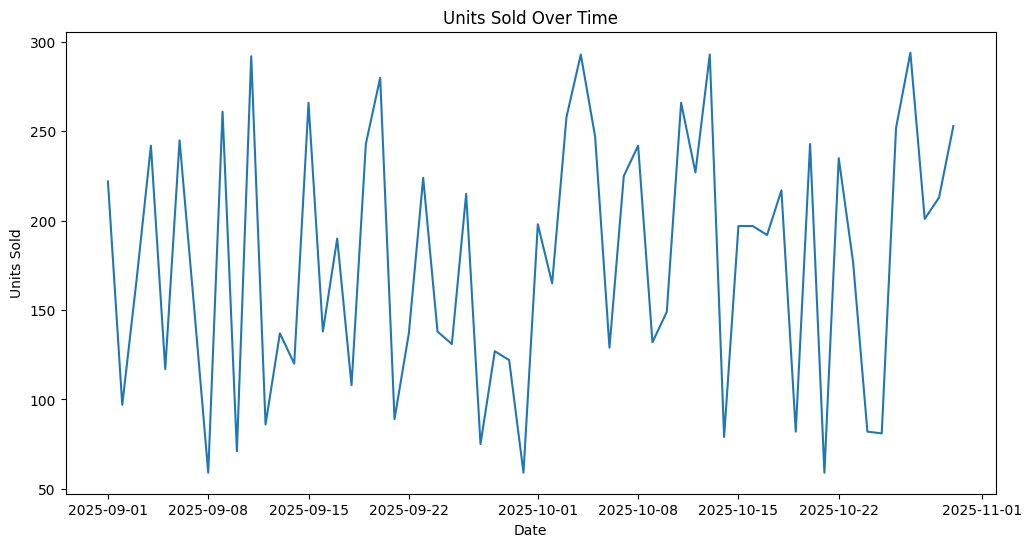

📊 Average Profit Margin: 42.00%


In [3]:
# Plot total units sold over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Units_Sold")
plt.title("Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

# Average profit margin
avg_profit_margin = df["Profit_Margin"].mean()
print(f"📊 Average Profit Margin: {avg_profit_margin:.2f}%")

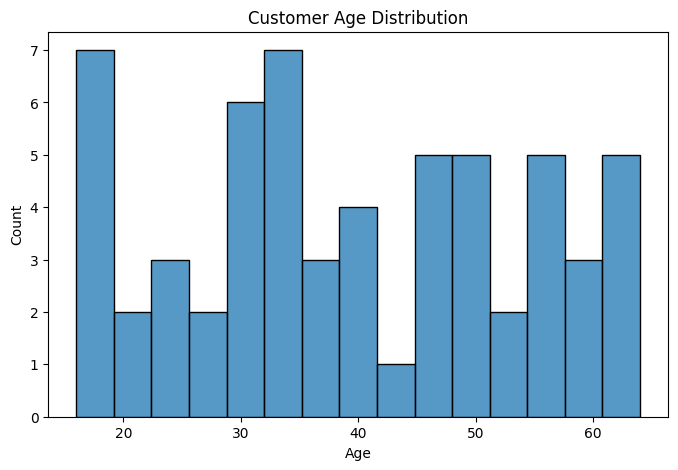

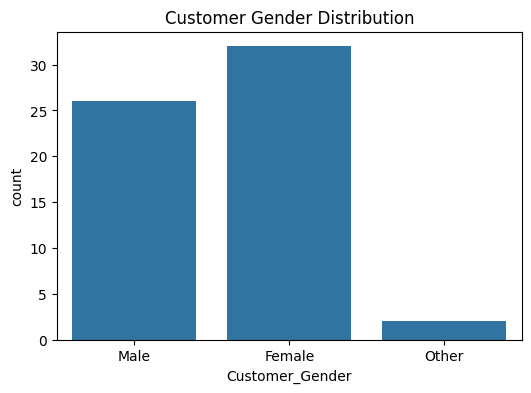

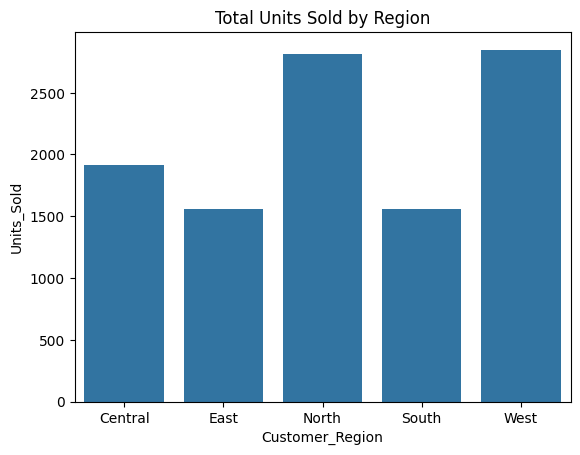

In [4]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Customer_Age"], bins=15)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gender count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Customer_Gender")
plt.title("Customer Gender Distribution")
plt.show()

# Sales by region
region_sales = df.groupby("Customer_Region")["Units_Sold"].sum().reset_index()
sns.barplot(data=region_sales, x="Customer_Region", y="Units_Sold")
plt.title("Total Units Sold by Region")
plt.show()

In [5]:
corr_age_sales = df["Customer_Age"].corr(df["Units_Sold"])
print(f"🧠 Correlation (Age vs Units Sold): {corr_age_sales:.2f}")

🧠 Correlation (Age vs Units Sold): 0.26
